In [34]:
#Importing the libraries
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import xarray as xr
import rioxarray as rxr
import geopandas as gpd
import harmonize as hz

## 1. Description of the DATASETS used

### 1.1.  Leaf Area Index - MOD15A2H:
Time resolution: 8 days
Spatial resolution: 500m
Temporal coverage: 2000-2019
Spatial coverage: Global
Source: https://lpdaac.usgs.gov/products/mod15a2hv061/
variables: LAI, FPAR, FCOVER
* LAI_500: Leaf Area Index
   value range of lai_500: 0-10
* Fpar_500: Fraction of Photosynthetically Active Radiation
*
* FCOVER: Fraction of Canopy Cover

*

### 1.1. Importing the Sentinel-2 data

In [35]:
# Open the dataset with xarray
path_data = "../data/Raw/"
ndvi = xr.open_dataset(path_data +'ndvi_01012010_09012022.nc')
lai = xr.open_dataset(path_data +'leaf_area_index_01012010_09012022.nc')
evap = xr.open_dataset(path_data +'Evapotranspiration_500m_aid0001.nc')

In [36]:
ds = lai

In [37]:
print(ds)

<xarray.Dataset>
Dimensions:          (time: 583, ydim: 518, xdim: 624)
Coordinates:
  * time             (time) object 2009-12-27 00:00:00 ... 2022-08-29 00:00:00
  * ydim             (ydim) float64 5.018e+06 5.018e+06 ... 4.779e+06 4.779e+06
  * xdim             (xdim) float64 3.398e+05 3.403e+05 ... 6.28e+05 6.285e+05
Data variables:
    crs              int8 ...
    FparExtra_QC     (time, ydim, xdim) float32 ...
    FparLai_QC       (time, ydim, xdim) float32 ...
    FparStdDev_500m  (time, ydim, xdim) float32 ...
    Fpar_500m        (time, ydim, xdim) float32 ...
    LaiStdDev_500m   (time, ydim, xdim) float32 ...
    Lai_500m         (time, ydim, xdim) float32 ...
Attributes:
    title:        MOD15A2H.061 for aid0001
    Conventions:  CF-1.6
    institution:  Land Processes Distributed Active Archive Center (LP DAAC)
    source:       AppEEARS v3.11
    references:   See README.md
    history:      See README.md


In [38]:
def print_start_end_date(ds):
    print("Start date: ", ds.time[0].values)
    print("End date: ", ds.time[-1].values)


In [39]:
print_start_end_date(ds)

Start date:  2009-12-27 00:00:00
End date:  2022-08-29 00:00:00


In [52]:
def time_resolution(ds):
    time = (ds.time[2] - ds.time[1]).values
    return time

In [53]:
time_resolution(ds)

numpy.timedelta64(691200000000000,'ns')

In [54]:
# Function to convert nanoseconds to days
def convert_nanoseconds_to_days(nanoseconds):
    return nanoseconds / 86400000000000


In [55]:
convert_nanoseconds_to_days(time_resolution(ds))

numpy.timedelta64(8,'ns')

In [43]:
# Check the range of the value of the data variables
print(ds.min())

<xarray.Dataset>
Dimensions:          ()
Data variables:
    crs              int8 -127
    FparExtra_QC     float64 0.0
    FparLai_QC       float64 0.0
    FparStdDev_500m  float64 0.0
    Fpar_500m        float64 0.0
    LaiStdDev_500m   float64 0.0
    Lai_500m         float64 0.0


In [45]:
print_time_resolution(ds)

Time resolution of:  691200000000000 nanoseconds


In [46]:
print(ds.time[1])

<xarray.DataArray 'time' ()>
array(cftime.DatetimeJulian(2010, 1, 1, 0, 0, 0, 0, has_year_zero=False),
      dtype=object)
Coordinates:
    time     object 2010-01-01 00:00:00
Attributes:
    standard_name:  time
    axis:           T


In [47]:
print(ds.max())

<xarray.Dataset>
Dimensions:          ()
Data variables:
    crs              int8 -127
    FparExtra_QC     float64 205.0
    FparLai_QC       float64 157.0
    FparStdDev_500m  float64 2.54
    Fpar_500m        float64 2.54
    LaiStdDev_500m   float64 25.4
    Lai_500m         float64 25.4


In [67]:
# Print all the unique values of the data variables of the xar
print(ds['Lai_500m'].values)


[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 ...

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan n

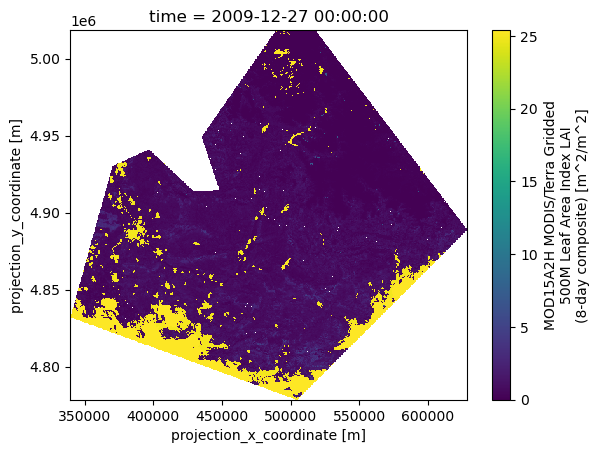

In [69]:
# plot the data
ds['Lai_500m'][0].plot()
plt.show()

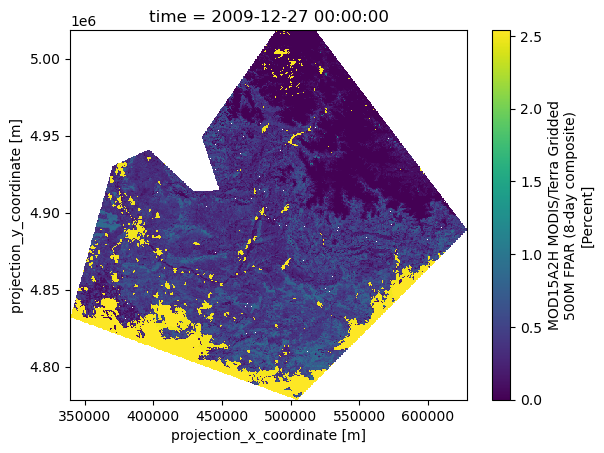

In [70]:
# plot the data
ds['Fpar_500m'][0].plot()
plt.show()

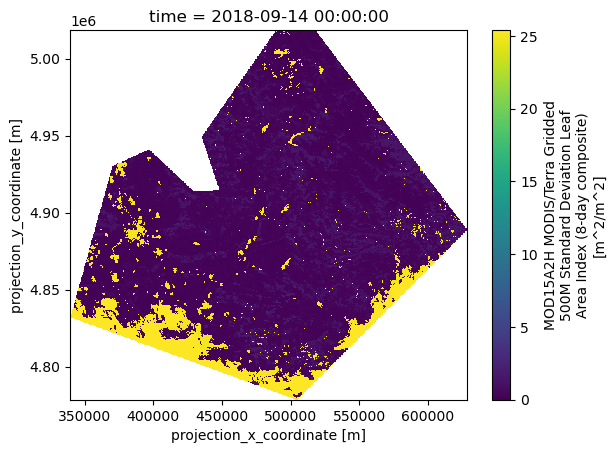

In [75]:
# plot the data
ds['LaiStdDev_500m'][400].plot()
plt.show()

In [48]:
# Check the coordinate system of the data
print(ds.crs)

<xarray.DataArray 'crs' ()>
array(-127, dtype=int8)
Attributes:
    grid_mapping_name:                      sinusoidal
    _CoordinateAxisTypes:                   GeoX GeoY
    spatial_ref:                            PROJCS["unknown",GEOGCS["unknown"...
    radius_of_sphere:                       6371007.181
    longitude_of_central_meridian:          0
    longitude_of_projection_origin:         0
    straight_vertical_longitude_from_pole:  0
    false_easting:                          0
    false_northing:                         0


In [49]:
# Check the spatial resolution of the data
#print(ndvi["_1_km_16_days_EVI"][0].res)